<a href="https://colab.research.google.com/github/Riya-vijay/DAILY-ASSIGNMENT/blob/main/assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv('/content/Wholesale_Customers_Data (1).csv')

# Assuming 'Delicassen' is the target variable (y) and the rest are features (X)
X = data.drop('Delicassen', axis=1)
y = data['Delicassen']

In [5]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Step 5: Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

In [6]:
# Step 6: Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

In [12]:
# Step 7: RandomForest with GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
rf_pred = best_rf.predict(X_test)

In [8]:
# Step 8: Evaluation Function
def evaluate(model_name, y_true, y_pred):
    print(f"{model_name} R2 Score: {r2_score(y_true, y_pred):.4f}, MSE: {mean_squared_error(y_true, y_pred):.4f}")

evaluate("Linear Regression", y_test, lr_pred)
evaluate("Ridge Regression", y_test, ridge_pred)
evaluate("Lasso Regression", y_test, lasso_pred)
evaluate("RandomForest (GridSearch)", y_test, rf_pred)


Linear Regression R2 Score: -0.2018, MSE: 2667264.4290
Ridge Regression R2 Score: -0.2016, MSE: 2666813.5342
Lasso Regression R2 Score: -0.2018, MSE: 2667177.1867
RandomForest (GridSearch) R2 Score: -1.4887, MSE: 5523326.5175


Linear -> R2 Score: -0.2018, MSE: 2667264.4290
Ridge -> R2 Score: -0.2016, MSE: 2666813.5342
Lasso -> R2 Score: -0.2018, MSE: 2667177.1867
RandomForest -> R2 Score: -1.4887, MSE: 5523326.5175


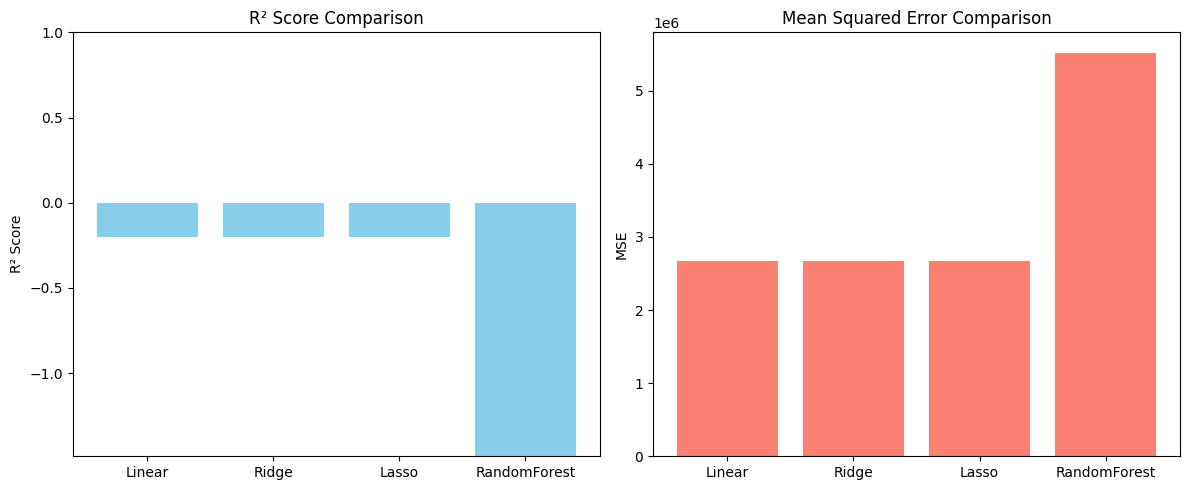

In [14]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Use existing data splits from previous cells
# X_train, X_test, y_train, y_test are already defined

# Step 3: Initialize Models
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
rf = RandomForestRegressor(random_state=42)

# Step 4: Fit Models
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Step 5: Grid Search for RandomForest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Step 6: Predictions
lr_pred = lr.predict(X_test)
ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)
rf_pred = best_rf.predict(X_test)

# Step 7: Evaluation
models = ['Linear', 'Ridge', 'Lasso', 'RandomForest']
r2_scores = [
    r2_score(y_test, lr_pred),
    r2_score(y_test, ridge_pred),
    r2_score(y_test, lasso_pred),
    r2_score(y_test, rf_pred)
]
mses = [
    mean_squared_error(y_test, lr_pred),
    mean_squared_error(y_test, ridge_pred),
    mean_squared_error(y_test, lasso_pred),
    mean_squared_error(y_test, rf_pred)
]

# Step 8: Print Scores
for name, r2, mse in zip(models, r2_scores, mses):
    print(f"{name} -> R2 Score: {r2:.4f}, MSE: {mse:.4f}")

# Step 9: Plotting R2 Scores and MSE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(models, r2_scores, color='skyblue')
plt.title("R² Score Comparison")
plt.ylabel("R² Score")
plt.ylim(min(0, min(r2_scores)), 1) # Adjust y-axis limits to include negative R2 scores if any

plt.subplot(1, 2, 2)
plt.bar(models, mses, color='salmon')
plt.title("Mean Squared Error Comparison")
plt.ylabel("MSE")

plt.tight_layout()
plt.show()